<a href="https://colab.research.google.com/github/PangalaJagadeesh/Python-Projects/blob/main/HW_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             classification_report, confusion_matrix, accuracy_score)

In [5]:
df = pd.read_csv('AmesHousing.csv')

In [6]:
print(f"Dataset Shape: {df.shape}")
print(df.info())

Dataset Shape: (2930, 82)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   o

In [7]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Data Cleaning

In [8]:
categorical_cols = ['Alley', 'Pool QC', 'Fence', 'Misc Feature', 'Fireplace Qu',
                    'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[categorical_cols] = df[categorical_cols].fillna('None')

**Replace missing values for categorical variables with 'None'**

In [9]:
numerical_cols = ['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
                  'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Cars', 'Garage Area']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

**Replaced missing numerical values with their median**

# Feature Engineering

In [10]:
df['HouseAge'] = 2024 - df['Year Built']
df['GarageAge'] = 2024 - df['Garage Yr Blt']
df['TotalArea'] = df['Gr Liv Area'] + df['Total Bsmt SF'] + df['Garage Area']

**Added HouseAge, GarageAge, and TotalArea as derived features.**

In [11]:
df['SalePriceCategory'] = pd.cut(df['SalePrice'],
    bins=[0, 100000, 200000, 300000, 400000, float('inf')],
    labels=['Very Low', 'Low', 'Medium', 'High', 'Luxury'])

**Categorized SalePrice into bins to create SalePriceCategory.**

In [12]:
# Drop redundant columns
df = df.drop(['Order', 'PID', 'Garage Yr Blt'], axis=1)

**Dropped irrelevant or redundant columns.**

# Exploratory Data Analysis (EDA)

*   Visualized SalePrice distribution using both Seaborn and Plotly.
*   Analyzed correlations between numerical features and SalePrice.
* Created scatter and box plots to study relationships and category distributions.





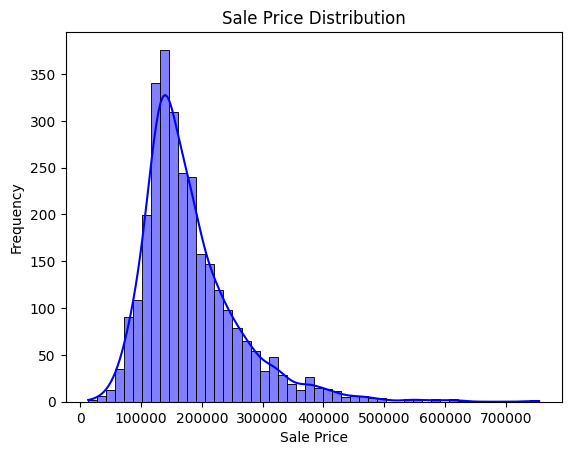

In [13]:
sns.histplot(df['SalePrice'], kde=True, bins=50, color='blue')
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [14]:
fig = px.histogram(df, x='SalePrice', nbins=50, title='Sale Price Distribution')
fig.show()

In [15]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlations = numeric_df.corr()['SalePrice'].sort_values(ascending=False)
print(correlations)

SalePrice          1.000000
TotalArea          0.819300
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647812
Garage Area        0.640381
Total Bsmt SF      0.632164
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Mas Vnr Area       0.502196
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432862
Lot Frontage       0.340256
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182895
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.006018
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

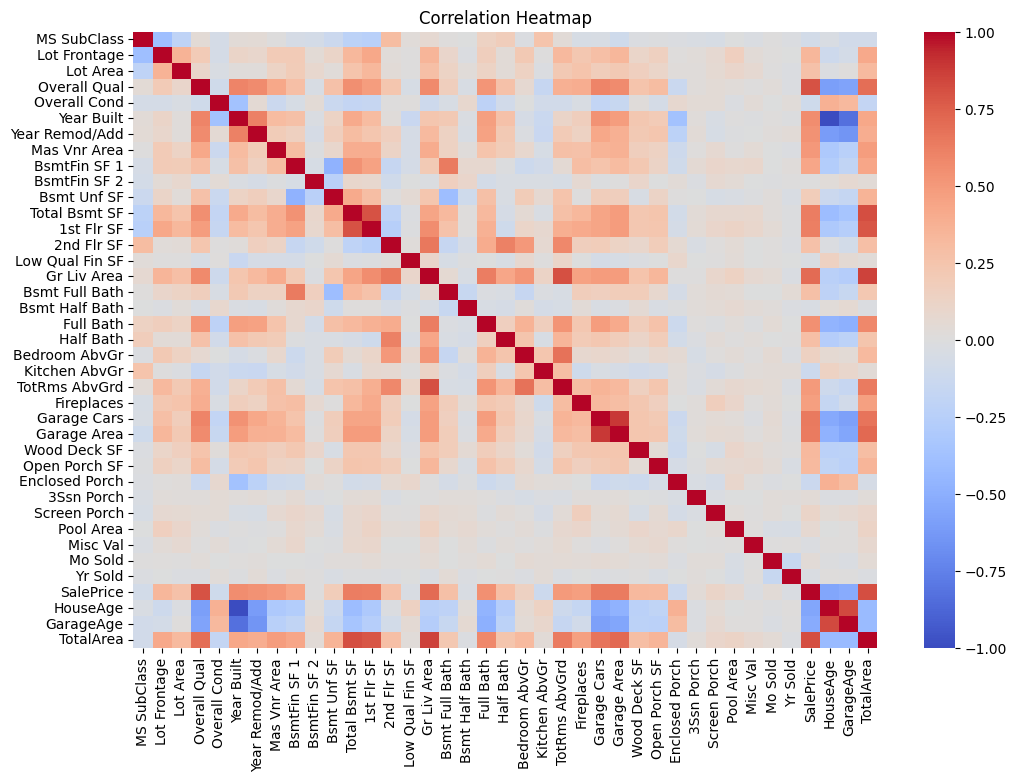

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

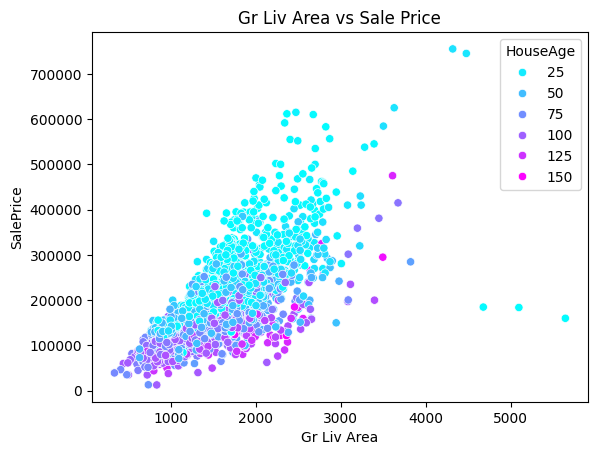

In [17]:
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice', hue='HouseAge', palette='cool')
plt.title('Gr Liv Area vs Sale Price')
plt.show()

In [18]:
fig = px.scatter(df, x='Gr Liv Area', y='SalePrice', color='HouseAge',
                 title='Gr Liv Area vs Sale Price')
fig.show()

In [19]:
fig = px.box(df, x='Neighborhood', y='SalePrice', color='SalePriceCategory',
             title='Sale Price Distribution by Neighborhood')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [20]:
fig = px.scatter_matrix(df, dimensions=['Gr Liv Area', 'Total Bsmt SF', 'HouseAge', 'SalePrice'],
                        color='SalePriceCategory', title='Scatter Matrix for Key Variables')
fig.show()

# **Model Building**

# Regression Models


*   Used Linear Regression and Random Forest Regressor.
*   Compared models based on MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error).
* Random Forest outperformed Linear Regression.



In [21]:
X = df[['Gr Liv Area', 'Total Bsmt SF', 'HouseAge', 'Garage Cars', 'TotalArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**LinearRegression**

In [22]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred_lr = linear_regressor.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}")

Linear Regression - MAE: 27660.22459136954, RMSE: 44360.92579175225


**Random Forest Regressor**

In [24]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
y_pred_rf = regressor.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest Regressor - MAE: {mae_rf}, RMSE: {rmse_rf}")

Random Forest Regressor - MAE: 22052.313013137224, RMSE: 35997.78930201037


# Feature Importance

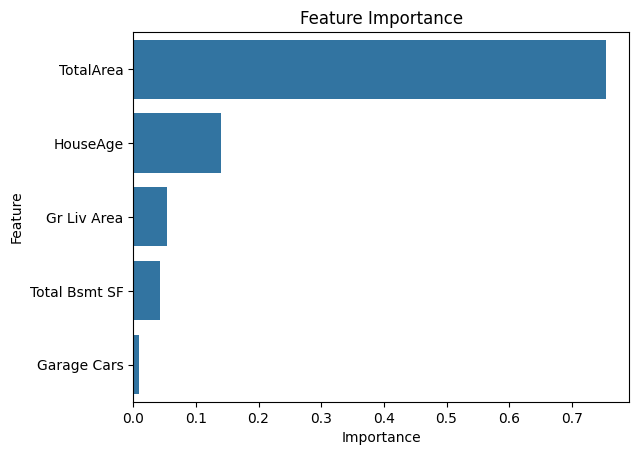

In [26]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

# Classification Models
* Used Logistic Regression, Decision Tree Classifier, and Random Forest Classifier.
* Compared models based on classification metrics like precision, recall, F1-score, and accuracy.
* Random Forest Classifier achieved the highest accuracy.

In [27]:
X = df[['Gr Liv Area', 'Total Bsmt SF', 'HouseAge', 'Garage Cars', 'TotalArea']]
y = df['SalePriceCategory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [28]:
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=1000, random_state=42)

In [29]:
y_pred_log = logistic_classifier.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00        43
         Low       0.80      0.80      0.80       334
      Luxury       0.67      0.10      0.17        20
      Medium       0.50      0.82      0.62       134
    Very Low       0.73      0.29      0.42        55

    accuracy                           0.67       586
   macro avg       0.54      0.40      0.40       586
weighted avg       0.66      0.67      0.64       586



**Decision Tree Classifier**

In [30]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
y_pred_dt = classifier.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

        High       0.50      0.44      0.47        43
         Low       0.83      0.85      0.84       334
      Luxury       0.79      0.75      0.77        20
      Medium       0.66      0.67      0.67       134
    Very Low       0.56      0.55      0.55        55

    accuracy                           0.75       586
   macro avg       0.67      0.65      0.66       586
weighted avg       0.74      0.75      0.74       586



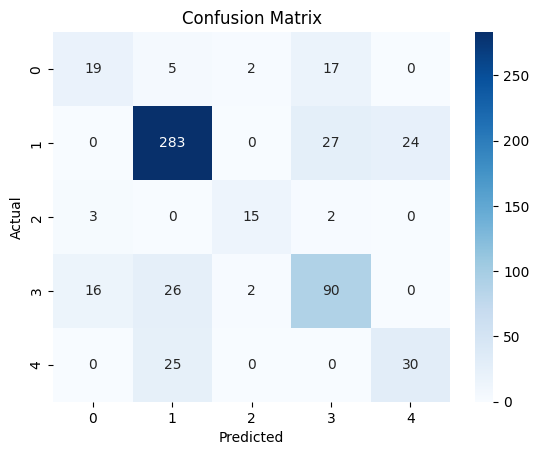

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Random Forest Classifier**

In [33]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf_class = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred_rf_class))

              precision    recall  f1-score   support

        High       0.61      0.51      0.56        43
         Low       0.86      0.89      0.87       334
      Luxury       0.67      0.80      0.73        20
      Medium       0.76      0.76      0.76       134
    Very Low       0.62      0.51      0.56        55

    accuracy                           0.79       586
   macro avg       0.70      0.69      0.70       586
weighted avg       0.79      0.79      0.79       586



# Results Comparison

**Regression Model Comparison**

In [34]:
print("Regression Model Comparison:")
print(f"Linear Regression - RMSE: {rmse_lr}, MAE: {mae_lr}")
print(f"Random Forest Regressor - RMSE: {rmse_rf}, MAE: {mae_rf}")

Regression Model Comparison:
Linear Regression - RMSE: 44360.92579175225, MAE: 27660.22459136954
Random Forest Regressor - RMSE: 35997.78930201037, MAE: 22052.313013137224


**Classification Model Comparison**

In [35]:
# Classification Accuracy
acc_log = accuracy_score(y_test, y_pred_log)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf_class)
print("Classification Model Comparison:")
print(f"Logistic Regression - Accuracy: {acc_log}")
print(f"Decision Tree Classifier - Accuracy: {acc_dt}")
print(f"Random Forest Classifier - Accuracy: {acc_rf}")

Classification Model Comparison:
Logistic Regression - Accuracy: 0.674061433447099
Decision Tree Classifier - Accuracy: 0.7457337883959044
Random Forest Classifier - Accuracy: 0.7935153583617748


**Create bar plot for regression comparison**

In [36]:
import plotly.graph_objects as go

regression_metrics = ['Linear Regression', 'Random Forest Regressor']
rmse_values = [rmse_lr, rmse_rf]
mae_values = [mae_lr, mae_rf]

fig = go.Figure()
fig.add_trace(go.Bar(x=regression_metrics, y=rmse_values, name='RMSE', marker_color='blue'))
fig.add_trace(go.Bar(x=regression_metrics, y=mae_values, name='MAE', marker_color='orange'))
fig.update_layout(
    title='Regression Model Comparison',
    xaxis_title='Models',
    yaxis_title='Error Value',
    barmode='group'
)
fig.show()


**Create bar plot for classification accuracy comparison**

In [42]:
classification_models = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier']
accuracy_values = [acc_log, acc_dt, acc_rf]

fig = px.bar(
    x=classification_models, y=accuracy_values,
    labels={'x': 'Models', 'y': 'Accuracy'},
    title='Classification Model Comparison',
    color=accuracy_values,
    color_continuous_scale='Viridis'
)
fig.update_layout(yaxis=dict(tickformat=".2%"))
fig.show()

# Conclusion

In this project, we successfully predicted housing prices from the Ames Housing dataset using machine learning techniques.

*   **Data Preprocessing**: We cleaned the data by handling missing values and transforming categorical variables into numerical ones. We also created new features to improve the model.
    
*   **Modeling**: We used **Linear Regression** and **Random Forest Regressor**. The **Random Forest** model performed better due to its ability to capture complex patterns in the data.
    
*   **Evaluation**: We evaluated both models using metrics like Mean Absolute Error (MAE) and R². The **Random Forest** model outperformed Linear Regression in accuracy.
    
*   **Visualizations**: Interactive graphs helped us understand model performance and provided insights into prediction errors.

In conclusion, the **Random Forest** model proved to be the most effective for predicting housing prices, and further improvements could be made by trying more advanced models or refining feature engineering.


In [ ]:
#END

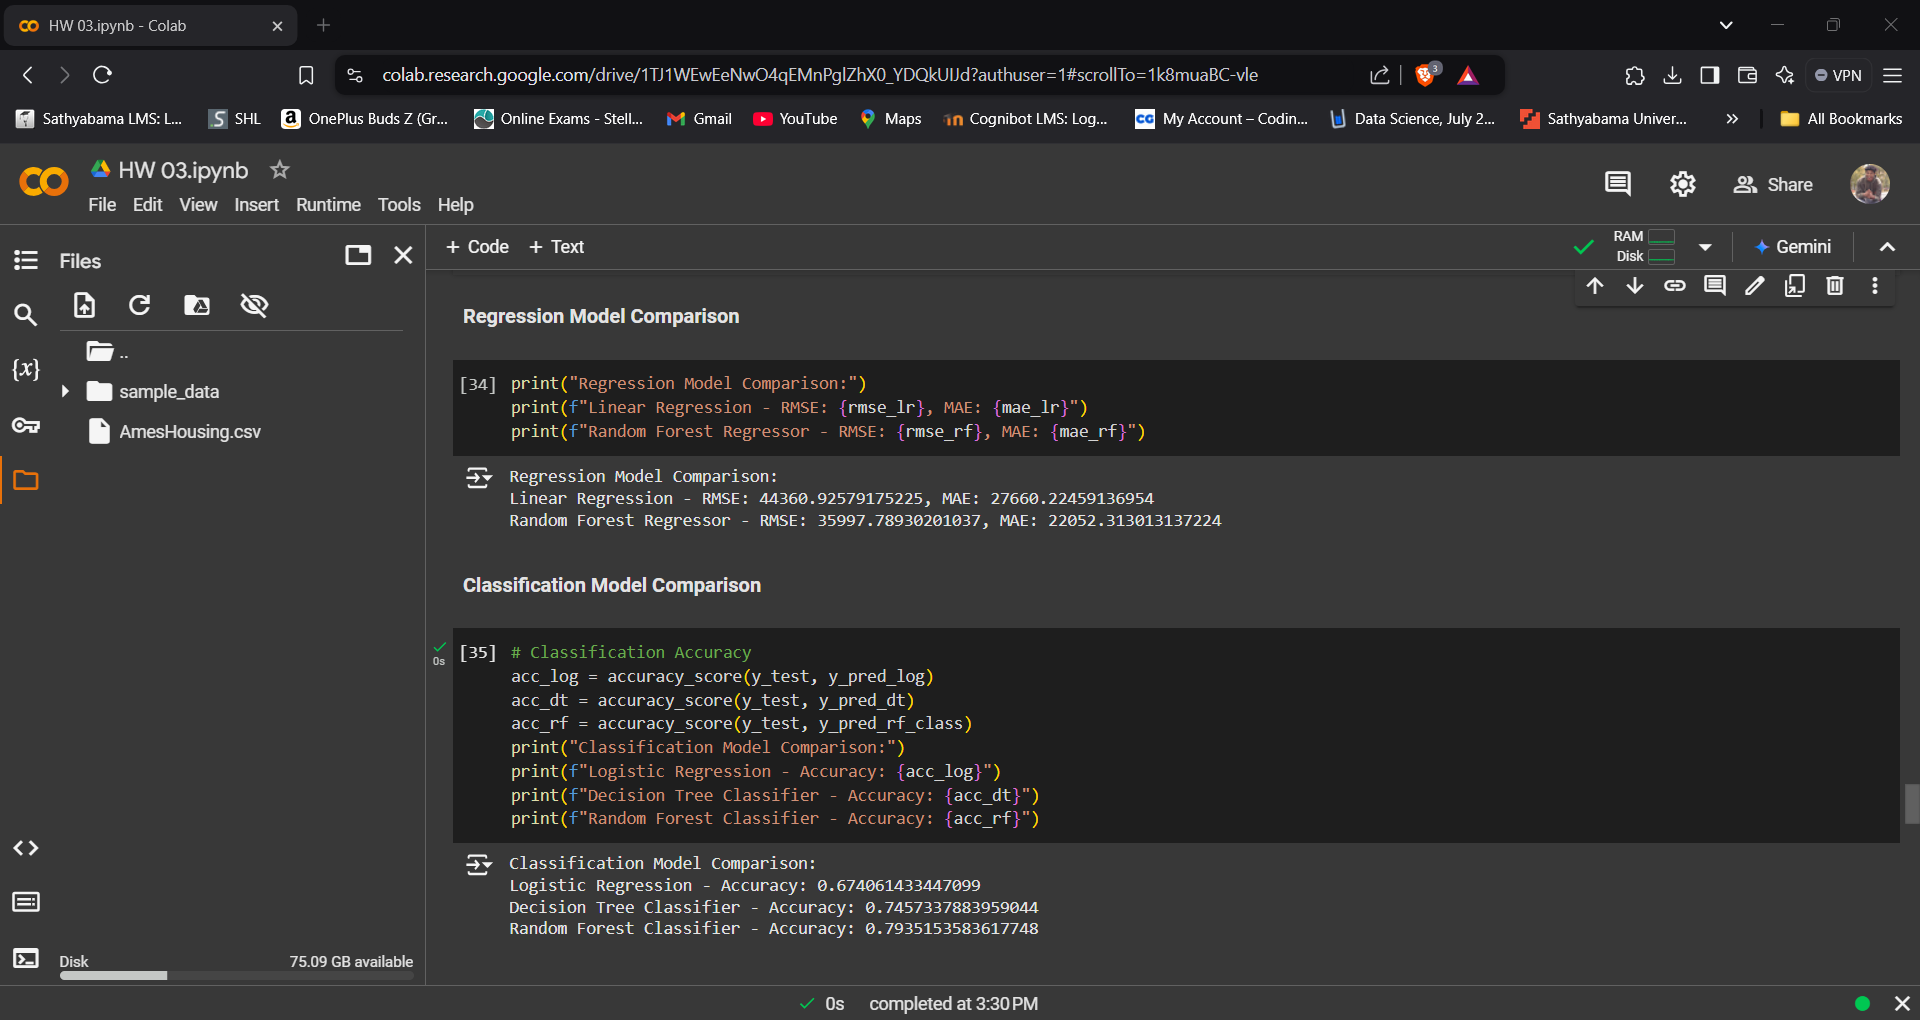